In [2]:
import numpy as np
from math import pi,cos,sin,sqrt,exp,log
import matplotlib.pylab as plt
import pandas as pd

In [3]:
Datos = pd.read_csv("Graficas_Suavizamiento.csv")
X = list(Datos.X)
Y = list(Datos.Y)

# Ejemplo 1

C:\Users\Alejandro\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Alejandro\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


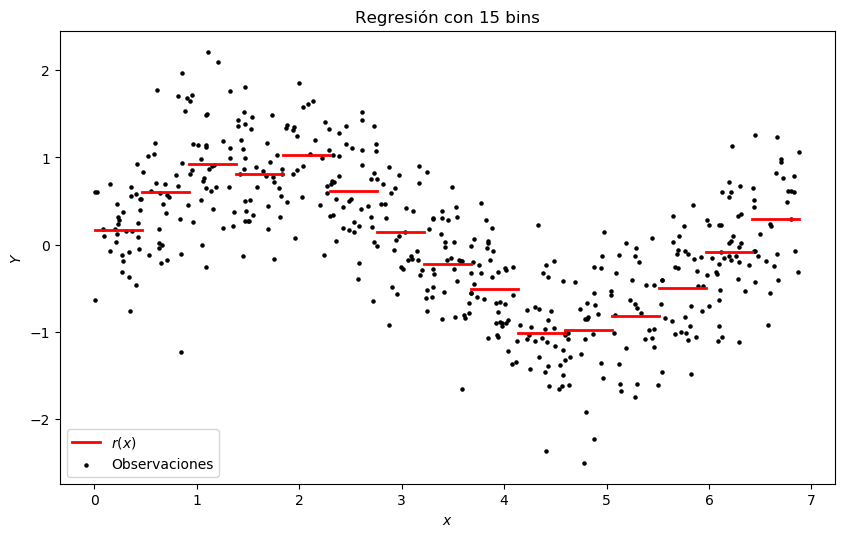

In [3]:
a,b=min(X),max(X)
m = 16
P = np.linspace(a,b,m)
K = [np.mean([x[1] for x in zip(X,Y) if P[j] < x[0] <= P[j+1] ]) for j in range(m)]
plt.figure(figsize=(10,6),dpi=100)
plt.title(f'Regresión con {m-1} bins')
plt.scatter(X,Y,label='Observaciones',color='black',s=5)
for j in range(m-1):
    if j == 0:
        plt.plot([P[j],P[j+1]],[K[j],K[j]],lw=2,color='red',label='$r(x)$')
    else:
        plt.plot([P[j],P[j+1]],[K[j],K[j]],lw=2,color='red')
plt.xlabel('$x$')
plt.ylabel('$Y$')
plt.legend(loc=3)
plt.show()

# Ejemplo 2

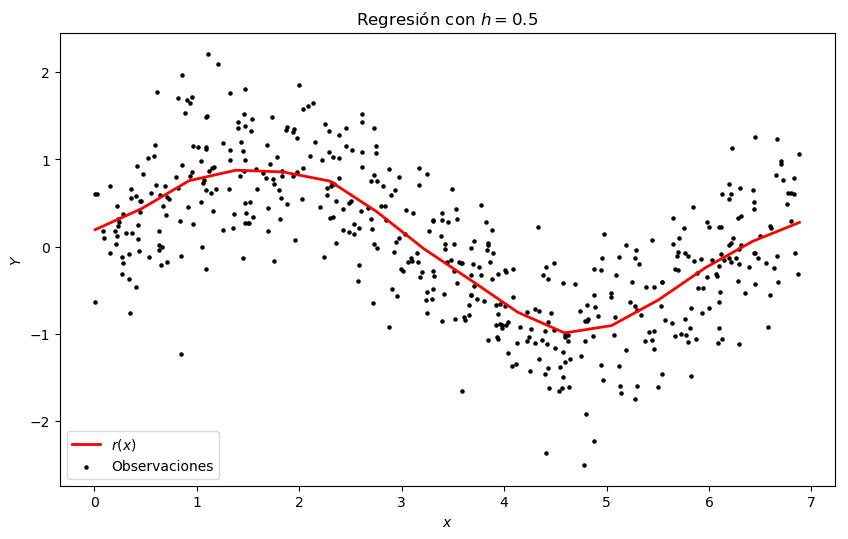

In [4]:
h = 0.5
n = lambda x:len([i for i in range(500) if abs(x-X[i])<=h])
r = lambda x:1/n(x)*sum([Y[i] for i in range(500) if abs(x-X[i])<=h])
plt.figure(figsize=(10,6),dpi=100)
plt.title(f'Regresión con $h={h}$')
plt.scatter(X,Y,label='Observaciones',color='black',s=5)
plt.plot(P,[r(x) for x in P],lw=2,color='red',label='$r(x)$')
plt.xlabel('$x$')
plt.ylabel('$Y$')
plt.legend(loc=3)

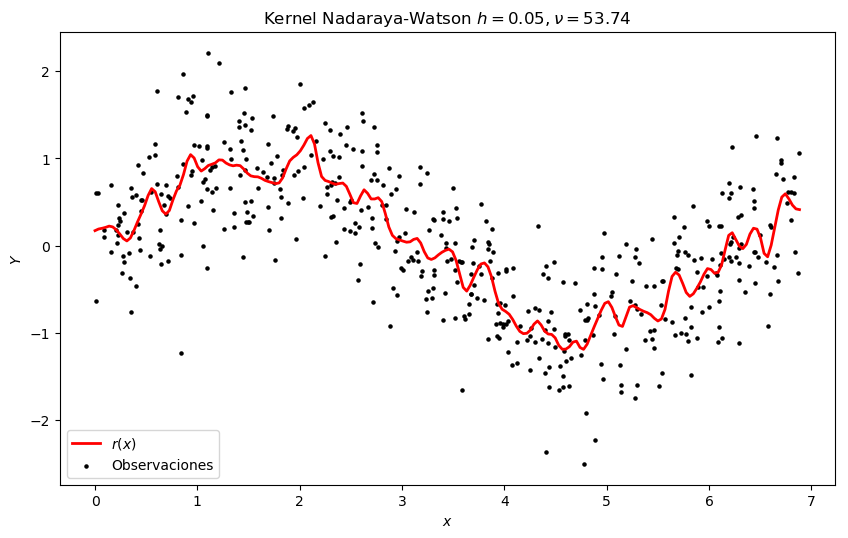

In [5]:
K = lambda x: 1/sqrt(2*pi)*exp(-x**2/2)
h= 0.05
l = lambda x: np.array([K((x-X[i])/h) for i in range(500)])
r = lambda x: sum((l(x)/sum(l(x)))*Y)
L = np.array([l(X[i])/sum(l(X[i])) for i in range(500)])
nu = np.trace(L)
plt.figure(figsize=(10,6),dpi=100)
plt.title(f'Kernel Nadaraya-Watson $h={h} , \\nu={nu:.2f}$')
plt.scatter(X,Y,label='Observaciones',color='black',s=5)
plt.plot(np.linspace(0,2*pi+0.6,200),[r(x) for x in np.linspace(0,2*pi+0.6,200)],lw=2,color='red',label='$r(x)$')
plt.xlabel('$x$')
plt.ylabel('$Y$')
plt.legend(loc=3)

Text(0, 0.5, '$\\hat{R}$')

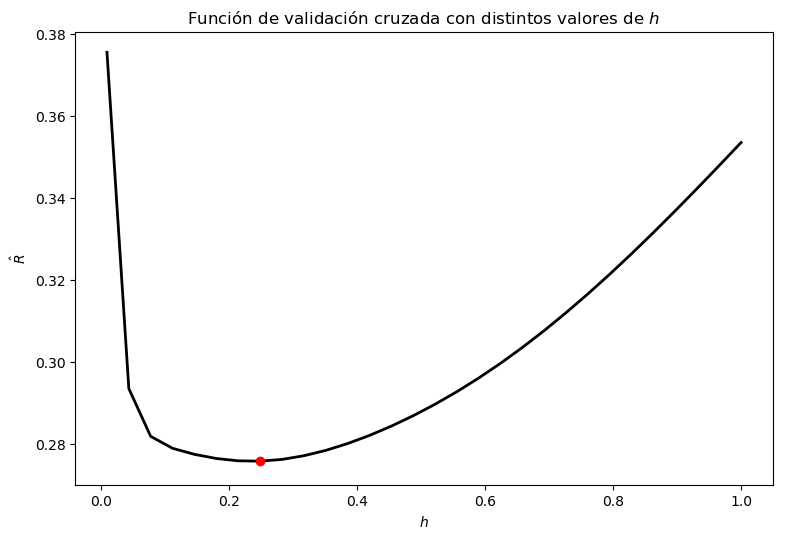

In [6]:
def R(h):
    l = lambda x: np.array([K((x-X[i])/h) for i in range(500)])
    r = lambda x: sum((l(x)/sum(l(x)))*Y)
    return((1/500)*sum([((Y[i] - r(X[i])) /(1-l(X[i])[i]/sum(l(X[i]))))**2 for i in range(500)]))
R_v = [R(h) for h in np.linspace(0.01,1,30)]
h_op = np.linspace(0.01,1,30)[np.argmin(R_v)]
plt.figure(figsize=(9,6),dpi=100)
plt.plot(np.linspace(0.01,1,30),R_v,color='black',lw=2)
plt.scatter([h_op],[min(R_v)],color='red',zorder=3)
plt.xlabel("$h$")
plt.title(f'Función de validación cruzada con distintos valores de $h$')
plt.ylabel("$\hat{R}$")

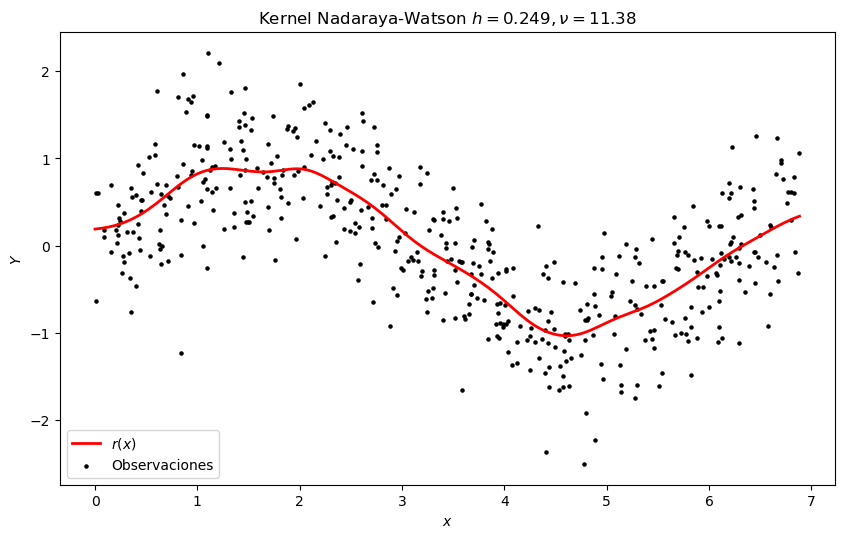

In [7]:
K = lambda x: 1/sqrt(2*pi)*exp(-x**2/2)
h= h_op
l = lambda x: np.array([K((x-X[i])/h) for i in range(500)])
r = lambda x: sum((l(x)/sum(l(x)))*Y)
L = np.array([l(X[i])/sum(l(X[i])) for i in range(500)])
nu = np.trace(L)
plt.figure(figsize=(10,6),dpi=100)
plt.title(f'Kernel Nadaraya-Watson $h={h:.3f} , \\nu={nu:.2f}$')
plt.scatter(X,Y,label='Observaciones',color='black',s=5)
plt.plot(np.linspace(0,2*pi+0.6,200),[r(x) for x in np.linspace(0,2*pi+0.6,200)],lw=2,color='red',label='$r(x)$')
plt.xlabel('$x$')
plt.ylabel('$Y$')
plt.legend(loc=3)

In [8]:
Datos = pd.read_csv("Graficas_Suavizamiento 2.csv")
X = list(Datos.X)
Y = list(Datos.Y)
n = len(X)
a,b = min(X),max(X)

Text(0, 0.5, 'Y')

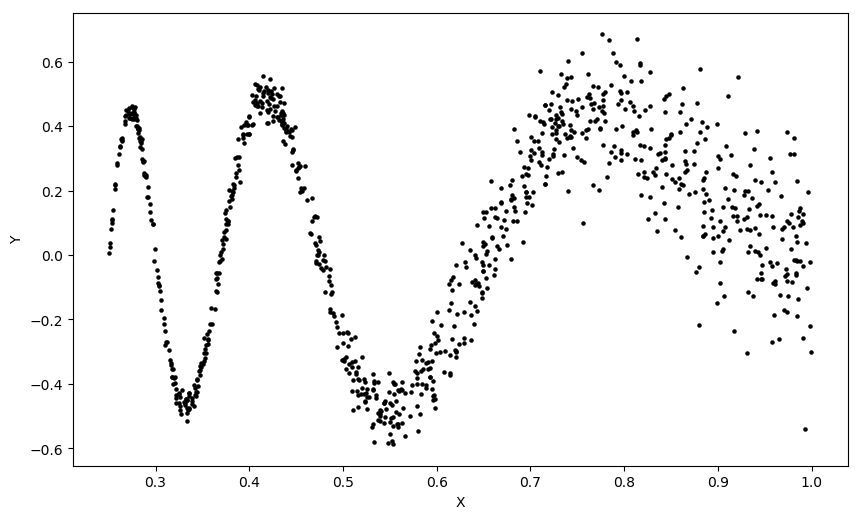

In [ ]:
plt.figure(figsize=(10,6),dpi=100)
plt.scatter(X,Y,color='black',s=5)
plt.xlabel("X")
plt.ylabel("Y")

Text(0, 0.5, '$\\hat{R}$')

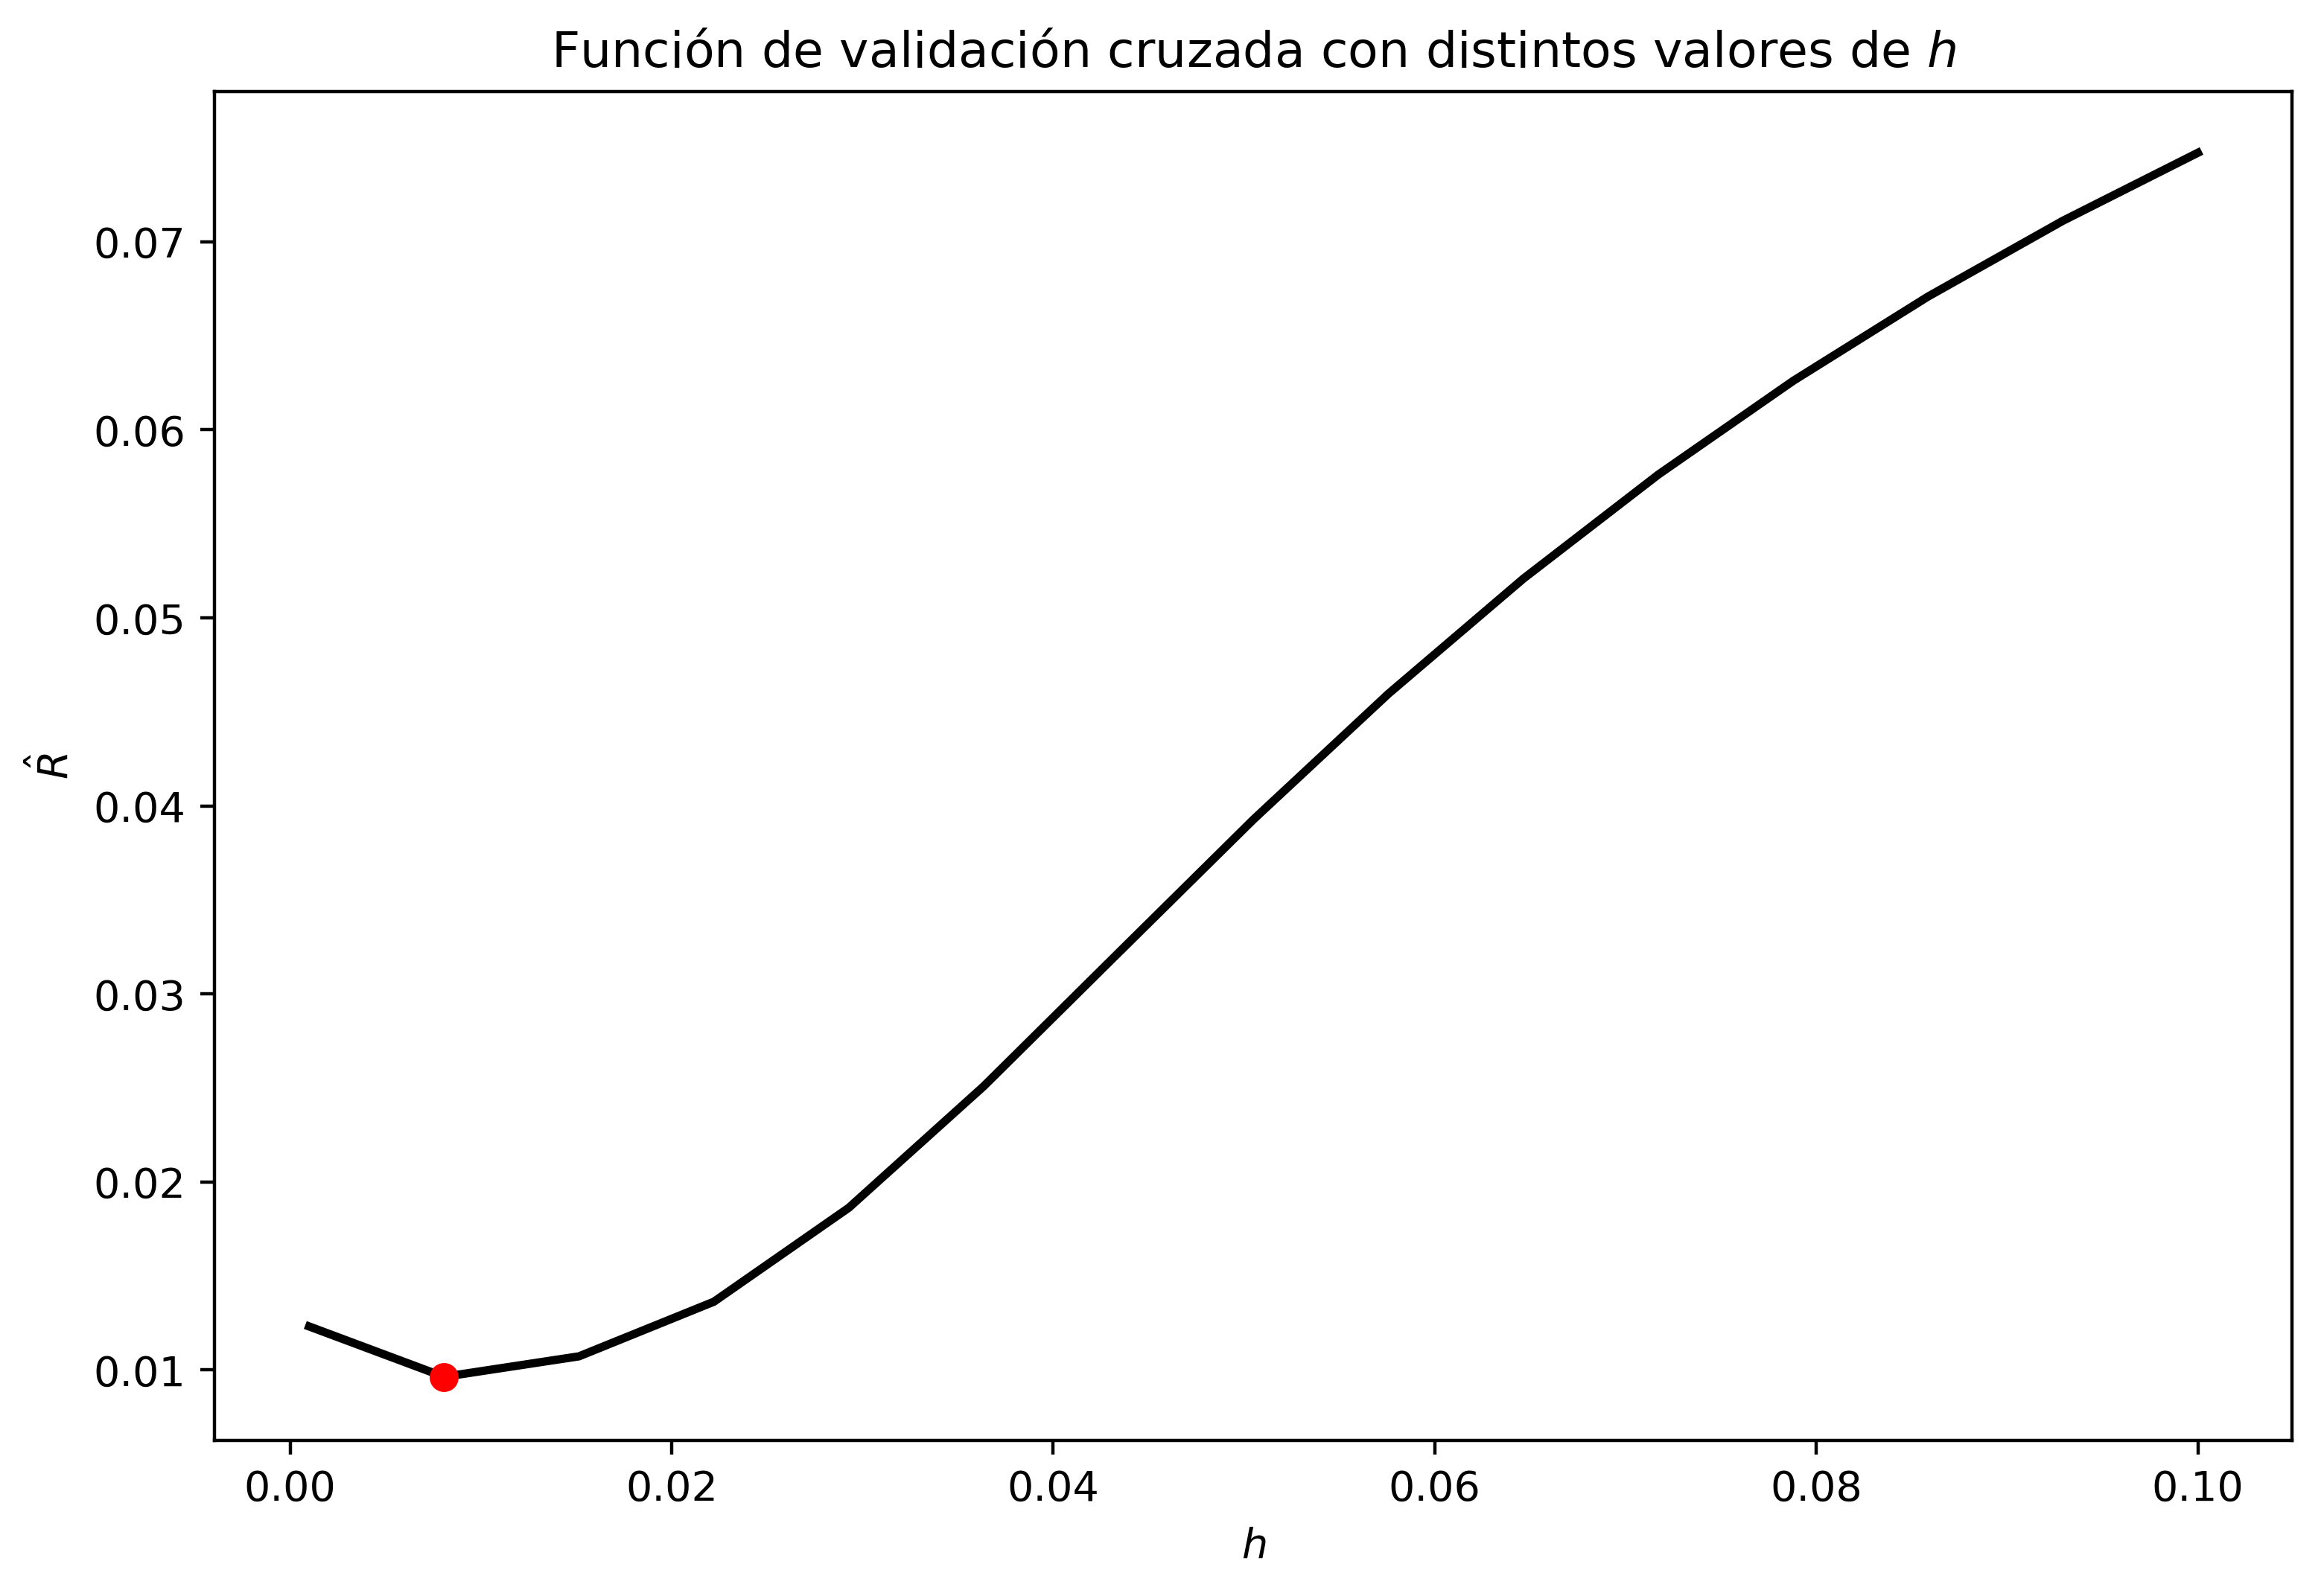

In [ ]:
def R(h):
    l = lambda x: np.array([K((x-X[i])/h) for i in range(1000)])
    r = lambda x: sum((l(x)/sum(l(x)))*Y)
    return((1/1000)*sum([((Y[i] - r(X[i])) /(1-l(X[i])[i]/sum(l(X[i]))))**2 for i in range(1000)]))
R_v = [R(h) for h in np.linspace(0.001,0.1,15)]
h_op = np.linspace(0.001,0.1,15)[np.argmin(R_v)]
plt.figure(figsize=(9,6),dpi=400)
plt.plot(np.linspace(0.001,0.1,15),R_v,color='black',lw=2)
plt.scatter([h_op],[min(R_v)],color='red',zorder=3)
plt.xlabel("$h$")
plt.title(f'Función de validación cruzada con distintos valores de $h$')
plt.ylabel("$\hat{R}$")

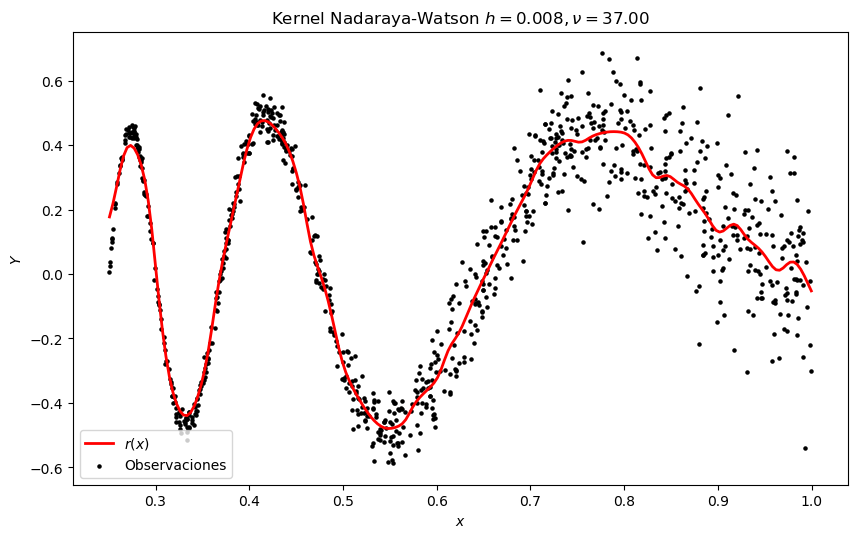

In [ ]:
K = lambda x: 1/sqrt(2*pi)*exp(-x**2/2)
h= h_op
l = lambda x: np.array([K((x-X[i])/h) for i in range(n)])
r = lambda x: sum((l(x)/sum(l(x)))*Y)
L = np.array([l(X[i])/sum(l(X[i])) for i in range(n)])
nu = np.trace(L)
plt.figure(figsize=(10,6),dpi=100)
plt.title(f'Kernel Nadaraya-Watson $h={h:.3f} , \\nu={nu:.2f}$')
plt.scatter(X,Y,label='Observaciones',color='black',s=5)
plt.plot(np.linspace(a,b,200),[r(x) for x in np.linspace(a,b,200)],lw=2,color='red',label='$r(x)$')
plt.xlabel('$x$')
plt.ylabel('$Y$')
plt.legend(loc=3)

In [ ]:
Z = np.array([log((Y[i]-r(X[i]))**2) for i in range(n)])

Text(0, 0.5, '$Z$')

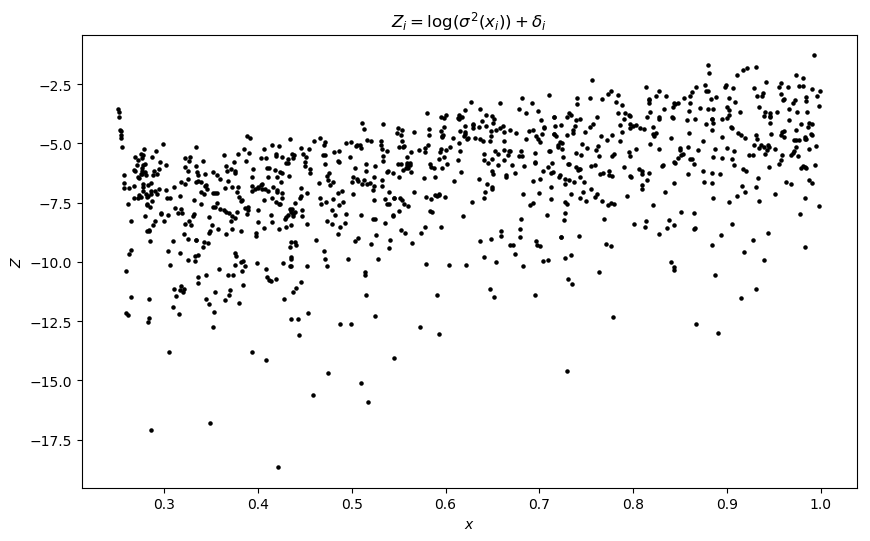

In [ ]:
K = lambda x: 1/sqrt(2*pi)*exp(-x**2/2)
h= 0.05
l = lambda x: np.array([K((x-X[i])/h) for i in range(n)])
r = lambda x: sum((l(x)/sum(l(x)))*Z)
L = np.array([l(X[i])/sum(l(X[i])) for i in range(n)])
nu = np.trace(L)
plt.figure(figsize=(10,6),dpi=100)
plt.title(f'$Z_i=\log(\sigma^2(x_i))+\delta_i$')
plt.scatter(X,Z,color='black',s=5)
# plt.plot(np.linspace(a,b,200),[r(x) for x in np.linspace(a,b,200)],lw=2,color='red',label='$r(x)$')
plt.xlabel('$x$')
plt.ylabel('$Z$')

In [ ]:
def R(h):
    l = lambda x: np.array([K((x-X[i])/h) for i in range(1000)])
    r = lambda x: sum((l(x)/sum(l(x)))*Z)
    return((1/1000)*sum([((Z[i] - r(X[i])) /(1-l(X[i])[i]/sum(l(X[i]))))**2 for i in range(1000)]))
R_v = [R(h) for h in np.linspace(0.001,1,15)]
h_op = np.linspace(0.001,0.1,15)[np.argmin(R_v)]
plt.figure(figsize=(9,6),dpi=100)
plt.plot(np.linspace(0.001,0.1,15),R_v,color='black',lw=2)
plt.scatter([h_op],[min(R_v)],color='red',zorder=3)
plt.xlabel("$h$")
plt.title(f'Función de validación cruzada con distintos valores de $h$')
plt.ylabel("$\hat{R}$")

In [ ]:
K = lambda x: 1/sqrt(2*pi)*exp(-x**2/2)
h= h_op
l = lambda x: np.array([K((x-X[i])/h) for i in range(n)])
r = lambda x: sum((l(x)/sum(l(x)))*Z)
L = np.array([l(X[i])/sum(l(X[i])) for i in range(n)])
nu = np.trace(L)
plt.figure(figsize=(10,6),dpi=400)
plt.title(f'Kernel Nadaraya-Watson $h={h} , \\nu={nu:.2f}$')
plt.scatter(X,Z,label='$Z_i$',color='black',s=5)
plt.plot(np.linspace(a,b,200),[r(x) for x in np.linspace(a,b,200)],lw=2,color='red',label='$q(x)$')
plt.xlabel('$x$')
plt.ylabel('$Z$')
plt.legend(loc=3)

In [ ]:
plt.figure(figsize=(10,6),dpi=400)
plt.title(f'Estimación de la varianza')
plt.plot(np.linspace(a,b,200),[exp(r(x)) for x in np.linspace(a,b,200)],lw=2,color='red',label='$\sigma(x)$')
plt.xlabel('$x$')
plt.ylabel('$\sigma$')
plt.legend(loc=2)

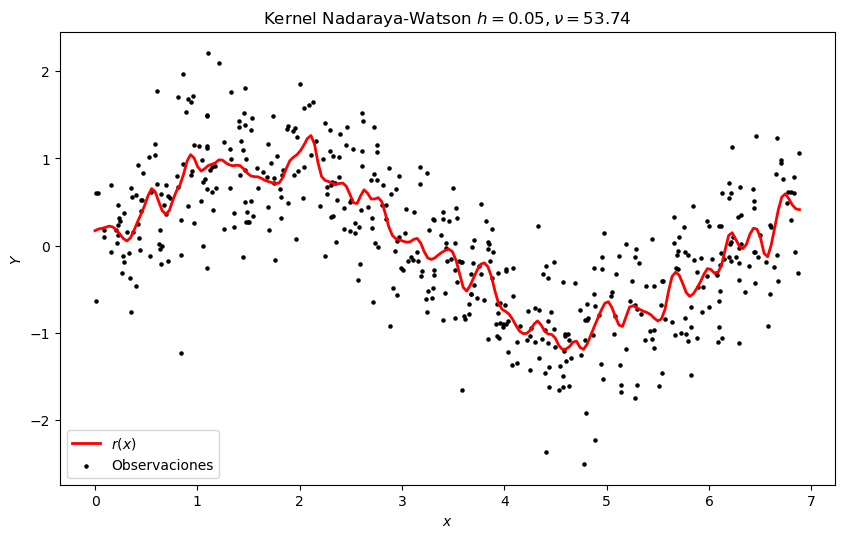

In [4]:
K = lambda x: 1/sqrt(2*pi)*exp(-x**2/2)
h= 0.05
l = lambda x: np.array([K((x-X[i])/h) for i in range(500)])
r = lambda x: sum((l(x)/sum(l(x)))*Y)
L = np.array([l(X[i])/sum(l(X[i])) for i in range(500)])
nu = np.trace(L)
plt.figure(figsize=(10,6),dpi=100)
plt.title(f'Kernel Nadaraya-Watson $h={h} , \\nu={nu:.2f}$')
plt.scatter(X,Y,label='Observaciones',color='black',s=5)
plt.plot(np.linspace(0,2*pi+0.6,200),[r(x) for x in np.linspace(0,2*pi+0.6,200)],lw=2,color='red',label='$r(x)$')
plt.xlabel('$x$')
plt.ylabel('$Y$')
plt.legend(loc=3)